## Линейная регрессия

Будем рассматривать датасет для предсказания времени задержки отправления рейса в минутах (DepDelay).

### Подготовка данных

#### Пропуски

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
%matplotlib inline

fly = pd.read_csv('2008.csv')
# fly = fly.fillna('_NaN_')


In [2]:
fly.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Заметим, что номера рейсов и идентификатор перевозчика разнесены 
# в разные колонки. Чтобы соблюсти уникальность – объеденим значения.

carriers_nums = fly[['UniqueCarrier', 'FlightNum']]
carriers_nums.sort_values(by = 'FlightNum').head(10)

,UniqueCarrier,FlightNum
4326,WN,1
20554,AA,1
34267,US,1
40014,AA,1
46883,CO,1
21719,UA,1
47122,US,1
37334,US,1
22331,US,1
16374,B6,1


In [4]:
# Создадим новое поле с объединенным номером
carrier_and_num = fly['UniqueCarrier'] + fly['FlightNum'].astype(str)

# Обагатим полученным столбцом исходные данные(записано в конец таблицы)
fly['carrier_and_num'] = carrier_and_num

- Имеются ли пропущенные значения?
- Ответ: да, можно заменять средним или нулевым значением. Потом сравнить. 

In [5]:
# Наиболее частые значения столбцов
for column in fly.columns:
    print(column)
    print(fly[column].value_counts()[:3], '\n')

Year
2008    70000
Name: Year, dtype: int64 

Month
1    6272
7    6214
5    6145
Name: Month, dtype: int64 

DayofMonth
9     2393
29    2385
11    2368
Name: DayofMonth, dtype: int64 

DayOfWeek
1    10472
2    10329
5    10275
Name: DayOfWeek, dtype: int64 

DepTime
600.0     165
700.0     159
556.0     153
655.0     146
557.0     138
555.0     137
657.0     129
558.0     126
1500.0    126
658.0     126
656.0     125
900.0     120
1100.0    115
659.0     114
1005.0    113
554.0     111
1850.0    111
825.0     111
1710.0    110
625.0     110
630.0     109
1120.0    108
1340.0    106
755.0     105
1615.0    105
725.0     105
559.0     105
1555.0    105
720.0     104
705.0     104
         ... 
2320.0      6
2339.0      6
2353.0      6
531.0       6
20.0        6
2306.0      6
16.0        5
521.0       5
8.0         5
9.0         5
2317.0      5
37.0        5
519.0       5
510.0       5
22.0        5
15.0        5
505.0       5
455.0       5
2334.0      5
34.0        5
2346.0      5
23

KeyError: 3.0

In [6]:
# Количество уникальных значения в столбцах
for column in fly.columns:
    print(column)
    print(fly[column].unique().shape[0], '\n')

Year
1 

Month
12 

DayofMonth
31 

DayOfWeek
7 

DepTime
1281 

CRSDepTime
1111 

ArrTime
1374 

CRSArrTime
1273 

UniqueCarrier
20 

FlightNum
6999 

TailNum
5121 

ActualElapsedTime
489 

CRSElapsedTime
447 

AirTime
472 

ArrDelay
427 

DepDelay
398 

Origin
297 

Dest
299 

Distance
1336 

TaxiIn
80 

TaxiOut
166 

Cancelled
2 

CancellationCode
4 

Diverted
2 

CarrierDelay
276 

WeatherDelay
178 

NASDelay
250 

SecurityDelay
30 

LateAircraftDelay
275 

carrier_and_num
21899 



(array([10472., 10329., 10197., 10255., 10275.,  8607.,  9865.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

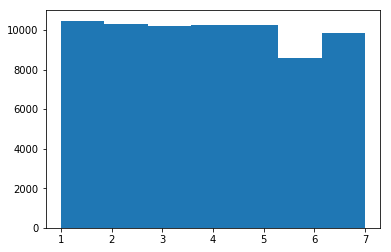

In [7]:
# Как распределены полдеты по дням недели
plt.hist(fly['DayOfWeek'], bins=7)
# Заметим, что что в субботу просадка по данным

In [8]:
'''
    NOT WORKING
    TO DO: Vadmim
'''
def parse_time(value):
    value = str(int(value))
    if len(value) < 4:
        value = '0'*(4 - len(value)) + value
    return value
    
def get_hours(value):
    if value != value:
        return np.nan
    value = parse_time(value)
    return int(value[:2])

def get_minutes(value):
    if value != value:
        return np.nan
    value = parse_time(value)
    return int(value[2:])

fly['DepTimeHours'] = fly['DepTime'].apply(lambda x: get_hours(x))
fly['DepTimeMinutes'] = fly['DepTime'].apply(lambda x: get_minutes(x))


In [9]:
fly.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,carrier_and_num,DepTimeHours,DepTimeMinutes
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,WN242,21.0,11.0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,XE2380,14.0,26.0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,WN1769,11.0,43.0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,OO3802,11.0,41.0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,WN399,8.0,15.0
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0,B6834,13.0,49.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,WN1589,13.0,59.0
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,DL617,18.0,15.0
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,WN454,6.0,26.0
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,UA270,19.0,5.0


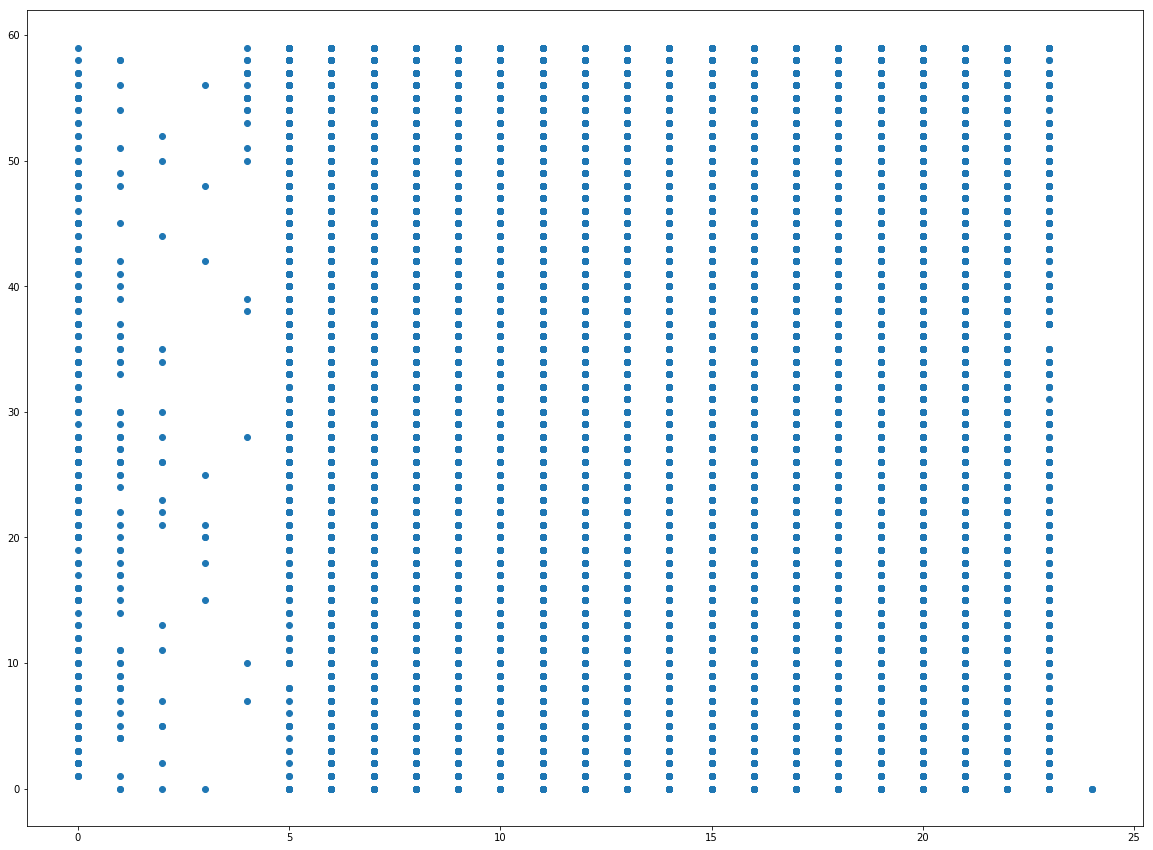

In [10]:
def remove_NaN_(column):
    return fly[column].replace(np.nan, fly[[column]].select_dtypes(include=[np.number]).mean())

fly['DepTimeHours'] = remove_NaN_('DepTimeHours')
fly['DepTimeMinutes'] = remove_NaN_('DepTimeMinutes')
plt.scatter(fly['DepTimeHours'], fly['DepTimeMinutes'])
plt.gcf().set_size_inches(20,15)

In [11]:
# fly[column] -- series
# fly[[column]] -- dataframe

In [12]:
# Убиваем строки, где нет значений fly['DepDelay']
fly = fly[fly['DepDelay'].notnull()]

In [13]:
# Убиваем столбцы, которые нам не подходят для анализа данных
fly = fly.drop(['Year','DepTime','ArrTime','AirTime','ArrDelay','ActualElapsedTime',\
 'TaxiIn','CancellationCode','TaxiOut',\
'Diverted','CarrierDelay','WeatherDelay','NASDelay',\
 'SecurityDelay','LateAircraftDelay', 'CRSDepTime', 'CRSArrTime', 'FlightNum'],axis=1)

In [14]:
fly.isnull().sum()

Month              0
DayofMonth         0
DayOfWeek          0
UniqueCarrier      0
TailNum            0
CRSElapsedTime     5
DepDelay           0
Origin             0
Dest               0
Distance           0
Cancelled          0
carrier_and_num    0
DepTimeHours       0
DepTimeMinutes     0
dtype: int64

In [15]:
# Заполним средним значением пустые значения строк
CRSElapsedTime_median = fly['CRSElapsedTime'].median()
fly['CRSElapsedTime'] = fly['CRSElapsedTime'].fillna(CRSElapsedTime_median)

Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Нужно исключить признаки, сильно коррелирующие с ответами.

In [16]:
fly.corr() # pyplot, seaborn

,Month,DayofMonth,DayOfWeek,CRSElapsedTime,DepDelay,Distance,Cancelled,DepTimeHours,DepTimeMinutes
Month,1.000000,-0.004535,-0.011494,-0.004354,-0.027598,-0.004735,0.019147,-0.008075,0.002816
DayofMonth,-0.004535,1.000000,0.014203,-0.005953,0.008002,-0.005968,-0.003119,0.001781,0.005180
DayOfWeek,-0.011494,0.014203,1.000000,0.015399,0.008023,0.016653,0.000500,0.005237,-0.000004
CRSElapsedTime,-0.004354,-0.005953,0.015399,1.000000,0.033906,0.983401,-0.007167,-0.012041,0.000943
DepDelay,-0.027598,0.008002,0.008023,0.033906,1.000000,0.024383,-0.000808,0.198260,-0.012637
Distance,-0.004735,-0.005968,0.016653,0.983401,0.024383,1.000000,-0.007604,-0.014135,0.000076
Cancelled,0.019147,-0.003119,0.000500,-0.007167,-0.000808,-0.007604,1.000000,0.005044,0.004246
DepTimeHours,-0.008075,0.001781,0.005237,-0.012041,0.198260,-0.014135,0.005044,1.000000,-0.065199
DepTimeMinutes,0.002816,0.005180,-0.000004,0.000943,-0.012637,0.000076,0.004246,-0.065199,1.000000


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду

In [17]:
fly.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,Cancelled,carrier_and_num,DepTimeHours,DepTimeMinutes
0,6,18,3,WN,N699SW,65.0,16.0,MDW,CLE,307,0,WN242,21.0,11.0
1,6,4,3,XE,N15980,138.0,16.0,IAH,AVL,834,0,XE2380,14.0,26.0
2,8,3,7,WN,N464WN,155.0,-2.0,MDW,TPA,997,0,WN1769,11.0,43.0
3,1,23,3,OO,N465SW,111.0,-3.0,SLC,FCA,532,0,OO3802,11.0,41.0
4,5,4,7,WN,N489WN,160.0,-5.0,LAS,AUS,1090,0,WN399,8.0,15.0


In [18]:
def scaler(column):
    mean = column.mean() # среднее
    std = column.std()# standart deviation, стандартное отклонение, сигма
    return (column - mean) / std

for column in ['CRSElapsedTime', 'Distance']: 
    fly[column] = scaler(fly[column])
    

In [19]:
fly.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,Cancelled,carrier_and_num,DepTimeHours,DepTimeMinutes
0,6,18,3,WN,N699SW,-0.914009,16.0,MDW,CLE,-0.741268,0,WN242,21.0,11.0
1,6,4,3,XE,N15980,0.130956,16.0,IAH,AVL,0.188102,0,XE2380,14.0,26.0
2,8,3,7,WN,N464WN,0.374304,-2.0,MDW,TPA,0.475554,0,WN1769,11.0,43.0
3,1,23,3,OO,N465SW,-0.255538,-3.0,SLC,FCA,-0.344478,0,OO3802,11.0,41.0
4,5,4,7,WN,N489WN,0.445877,-5.0,LAS,AUS,0.639560,0,WN399,8.0,15.0


Некоторые из признаков являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


In [20]:
# Убиваем отмененные рейсы для обучающей выборки
fly = fly[fly['Cancelled'] == 0]

In [21]:
fly.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,Cancelled,carrier_and_num,DepTimeHours,DepTimeMinutes
0,6,18,3,WN,N699SW,-0.914009,16.0,MDW,CLE,-0.741268,0,WN242,21.0,11.0
1,6,4,3,XE,N15980,0.130956,16.0,IAH,AVL,0.188102,0,XE2380,14.0,26.0
2,8,3,7,WN,N464WN,0.374304,-2.0,MDW,TPA,0.475554,0,WN1769,11.0,43.0
3,1,23,3,OO,N465SW,-0.255538,-3.0,SLC,FCA,-0.344478,0,OO3802,11.0,41.0
4,5,4,7,WN,N489WN,0.445877,-5.0,LAS,AUS,0.639560,0,WN399,8.0,15.0


In [22]:
categorical_features = ['DayOfWeek','UniqueCarrier','carrier_and_num', 'TailNum', 'Origin','Dest']

In [23]:
num_features = ['Month', 'DayofMonth', 'CRSElapsedTime', 'Distance', 'DepTimeHours', 'DepTimeMinutes']

In [24]:
# Определяем таргет
target = fly['DepDelay']

# Удаляем столбец с ответами из данных
del fly['DepDelay']

In [25]:
categorical_df = fly[categorical_features]

In [26]:
categorical_df.head()

,DayOfWeek,UniqueCarrier,carrier_and_num,TailNum,Origin,Dest
0,3,WN,WN242,N699SW,MDW,CLE
1,3,XE,XE2380,N15980,IAH,AVL
2,7,WN,WN1769,N464WN,MDW,TPA
3,3,OO,OO3802,N465SW,SLC,FCA
4,7,WN,WN399,N489WN,LAS,AUS


In [28]:
# Преобразование категориальных фич
from sklearn import preprocessing

# Сохраняем названия до инкодинга
categorical_names = dict()

for column in categorical_df.columns:
    encoder = preprocessing.LabelEncoder()
    categorical_df[column] = encoder.fit_transform(categorical_df[column])
    categorical_names[column] = encoder

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
categorical_names

{'DayOfWeek': LabelEncoder(),
 'Dest': LabelEncoder(),
 'Origin': LabelEncoder(),
 'TailNum': LabelEncoder(),
 'UniqueCarrier': LabelEncoder(),
 'carrier_and_num': LabelEncoder()}

In [30]:
categorical_df.head()

,DayOfWeek,UniqueCarrier,carrier_and_num,TailNum,Origin,Dest
0,2,17,18012,3524,176,60
1,2,18,20235,497,133,20
2,6,17,17402,2013,176,281
3,2,14,12575,2015,262,101
4,6,17,19212,2114,152,19


In [31]:
fly[num_features]

,Month,DayofMonth,CRSElapsedTime,Distance,DepTimeHours,DepTimeMinutes
0,6,18,-0.914009,-0.741268,21.0,11.0
1,6,4,0.130956,0.188102,14.0,26.0
2,8,3,0.374304,0.475554,11.0,43.0
3,1,23,-0.255538,-0.344478,11.0,41.0
4,5,4,0.445877,0.639560,8.0,15.0
5,1,3,0.503135,0.530223,13.0,49.0
6,3,31,-0.770863,-0.704234,13.0,59.0
7,4,22,3.466254,2.681704,18.0,15.0
8,3,4,0.732168,0.607817,6.0,26.0
9,10,6,1.161606,1.463119,19.0,5.0


In [32]:
fly_improved = pd.concat([fly[num_features], categorical_df], axis=1)

In [33]:
fly_improved

,Month,DayofMonth,CRSElapsedTime,Distance,DepTimeHours,DepTimeMinutes,DayOfWeek,UniqueCarrier,carrier_and_num,TailNum,Origin,Dest
0,6,18,-0.914009,-0.741268,21.0,11.0,2,17,18012,3524,176,60
1,6,4,0.130956,0.188102,14.0,26.0,2,18,20235,497,133,20
2,8,3,0.374304,0.475554,11.0,43.0,6,17,17402,2013,176,281
3,1,23,-0.255538,-0.344478,11.0,41.0,2,14,12575,2015,262,101
4,5,4,0.445877,0.639560,8.0,15.0,6,17,19212,2114,152,19
5,1,3,0.503135,0.530223,13.0,49.0,3,4,3728,3123,212,149
6,3,31,-0.770863,-0.704234,13.0,59.0,0,17,17220,1581,2,219
7,4,22,3.466254,2.681704,18.0,15.0,1,6,5789,1520,147,154
8,3,4,0.732168,0.607817,6.0,26.0,1,17,19278,3074,174,174
9,10,6,1.161606,1.463119,19.0,5.0,0,15,14603,1800,78,218


In [35]:
categorical_features

['DayOfWeek', 'UniqueCarrier', 'carrier_and_num', 'TailNum', 'Origin', 'Dest']

In [39]:
[x in categorical_features for x in fly_improved.columns]

[False, False, False, False, False, False, True, True, True, True, True, True]

In [50]:
# Препроцессинг(Векторизуем данные)
from sklearn.preprocessing import OneHotEncoder
ohencoder = OneHotEncoder(categorical_features=[x in categorical_features for x in fly_improved.columns])
fly_encoded = ohencoder.fit_transform(fly_improved)
fly_encoded

<68589x27502 sparse matrix of type '<class 'numpy.float64'>'
	with 821126 stored elements in COOrdinate format>

In [51]:
fly_encoded

<68589x27502 sparse matrix of type '<class 'numpy.float64'>'
	with 821126 stored elements in COOrdinate format>

Разделим выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [52]:
from sklearn.model_selection import train_test_split

In [57]:
# Разделим на обучающую и тестовую(отложенную) выборки
x_train, x_test, y_train, y_test = train_test_split(fly_encoded, target, test_size=0.3, random_state=0)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).


In [58]:
import sklearn
from sklearn import linear_model#.LinearRegression

In [60]:
# Создаем модель для обучения(Обычная линейная регрессия)
model = linear_model.LinearRegression(n_jobs=4)

In [62]:
# Обучение модели
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [64]:
# Предсказание
predicted = model.predict(x_test)

In [72]:
# Метрика качества RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predicted))

45.72115035586389

In [73]:
# Метрика качества MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted)

27.588850892393967

$$\frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \lambda|w|_1 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.



In [75]:
# Создаем модель для обучения(Линейная регрессия с L1-регуляризацией)
model_reg = linear_model.Lasso()
%time model_reg.fit(x_train, y_train)

CPU times: user 6.67 s, sys: 32.2 ms, total: 6.7 s
Wall time: 6.76 s


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
# Предсказание
predicted = model_reg.predict(x_test)

In [77]:
# Метрика качества MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted)

18.096413951422093

In [78]:
# Метрика качества RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predicted))

35.1301870209097

In [79]:
model_reg.coef_


array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        0.00000000e+00,  1.38856041e+00,  6.54087995e-04])

In [81]:
model.coef_

array([-19.56915091, -21.54407476, -22.11041236, ..., -10.4279901 ,
         2.2374561 ,   0.04010769])